# Bagging Ensemble

`Bagging = Bootstraping + Aggregating`

## Intuition
Suppose you have a dataset of 10K rows and you are using 100 models. We have to use Bagging. In bagging we can use different models i.e. different algorithms or we can use the same algorithm with the different dataset.

Summary:
 - Same dataset, different algorithm
 - Different dataset, same algorithm

We will make a subset of 1K rows or data which we be choosen randomly. This is called the Bootstraping and then we will feed those random datas to the models after that it will get evaluated and then we will get the result. This process is called the Aggregating. Combined is called: Bagging.

Everything in Bagging depends on the Low Bias and Low Variance, however no model can achieve this directly. Because from the theory of the bias and variance trade off, they both are opposite to each other. - High Bias Low Variance
- Low Bias High Variance

To achieve the Low Bias and Low Variance we need to focus on one thing that is the distributing the datas to the models.

Suppose we have 10k rows and in thsoe we have changed 100 rows randomly when they get splitted or choosen randonly to be feeded in the models then each of the model can get the data in the different format rither they can get that changed row or not which can make it in the distributed format. Here, this distribution of the data to the model lead to the Low Variance, as we have the Low bias in the Bagging. Hence, we achieved the Low Variance and Low Bias.

**NOTE:** The bootstaping in the Bagging is the technique through which we can achieve the Low Variance and Low Bias. We should use this always. Especially if our model is the Low Bias and High Variance then it is mandatory to use. This gives us more accuracy.

`Bootstraping: Low Bias and Low Variance`




## Bagging Ensemble - Implementation

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/content/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
encoder = LabelEncoder()

In [7]:
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0] [['SepalWidthCm', 'PetalLengthCm', 'Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


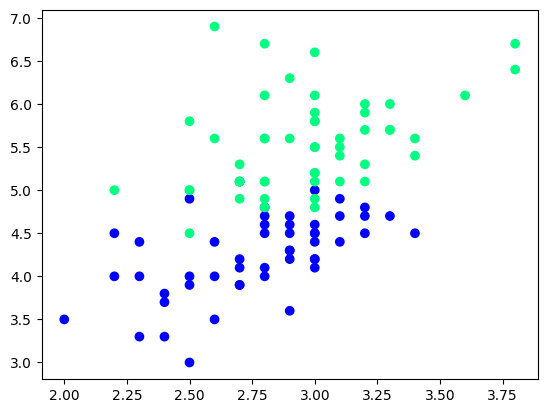

In [13]:
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'], c = df['Species'], cmap = 'winter')

In [14]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [15]:
df_train.head()

,SepalWidthCm,PetalLengthCm,Species
83,2.7,5.1,1
129,3.0,5.8,2
80,2.4,3.8,1
132,2.8,5.6,2
84,3.0,4.5,1


In [16]:
df_test.head()

,SepalWidthCm,PetalLengthCm,Species
93,2.3,3.3,1
70,3.2,4.8,1
95,3.0,4.2,1
68,2.2,4.5,1
114,2.8,5.1,2


In [17]:
df_val.head()

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
149,3.0,5.1,2
135,3.0,6.1,2
117,3.8,6.7,2
82,2.7,3.9,1


We will do training on `df_train` and testing on `df_val`

In [18]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

### Bootstaping

We will train 3 decision tree, and we will extract the sampling 80% of the data from the entire data to each one of them and this sampling will happen with replacement, it means rows can be repeated.

In [19]:
# Data for Decision Tree 1
df_bag = df_train.sample(8, replace = True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,SepalWidthCm,PetalLengthCm,Species
132,2.8,5.6,2
132,2.8,5.6,2
127,3.0,4.9,2
80,2.4,3.8,1
80,2.4,3.8,1
80,2.4,3.8,1
80,2.4,3.8,1
73,2.8,4.7,1


In [24]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

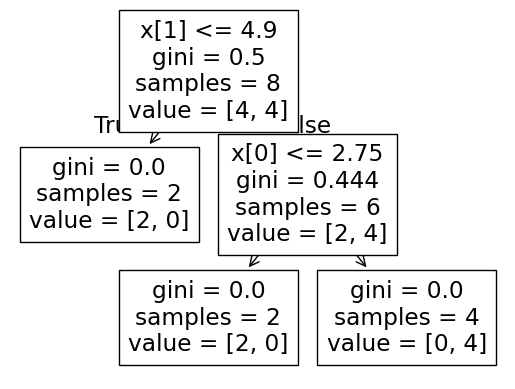

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


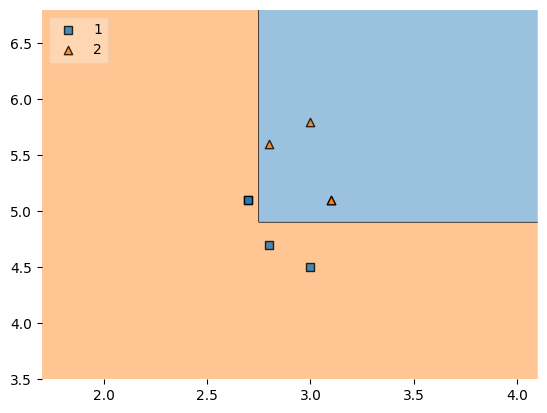

In [31]:
dt_bag1 = DecisionTreeClassifier() # low variance and high bias [without max_depth]
evaluate(dt_bag1, X, y)

In [26]:
# Data for Decision Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
132,2.8,5.6,2
127,3.0,4.9,2
80,2.4,3.8,1
80,2.4,3.8,1
83,2.7,5.1,1
80,2.4,3.8,1
129,3.0,5.8,2
129,3.0,5.8,2


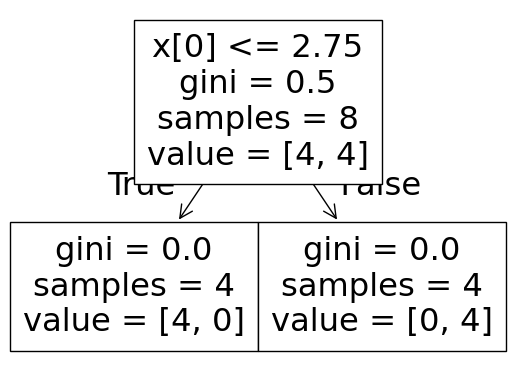

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


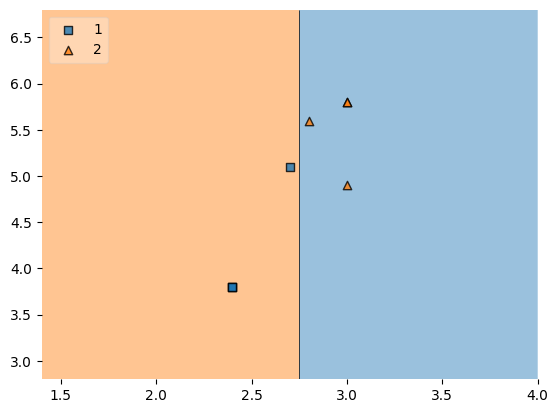

In [27]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [28]:
# Data for Decision Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
84,3.0,4.5,1
132,2.8,5.6,2
83,2.7,5.1,1
129,3.0,5.8,2
141,3.1,5.1,2
83,2.7,5.1,1
141,3.1,5.1,2
73,2.8,4.7,1


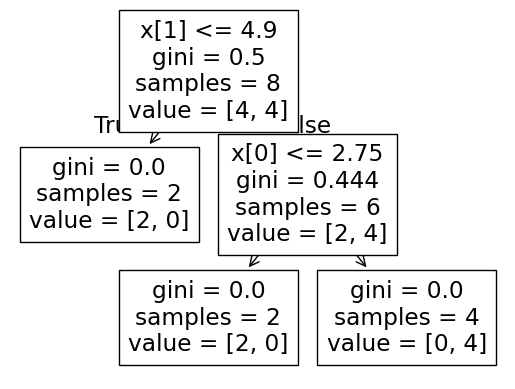

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


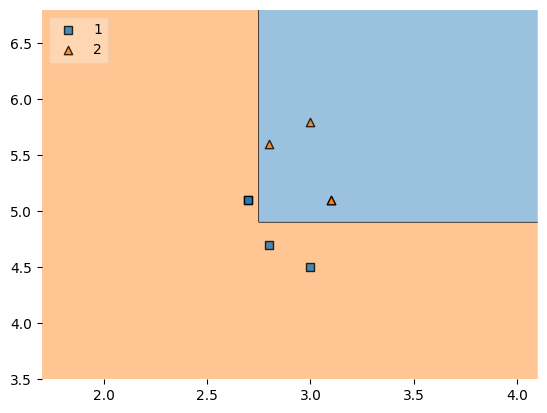

In [29]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

### Aggregation

We will use `df_test` for prediction

In [32]:
print("Predictor 1",dt_bag1.predict(np.array([3.0,4.5]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.0,4.5]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,4.5]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Bagging Types
The types of bagging depends on how you are creating the subsets. Here we have done the row sampling. If you want to do the column sampling then you can prefer, however the column sampling is preferred in the high dimensional data like: images, videos etc.

- Pasting: Row sampling without Replacement.
- Random Subspaces: Column Sampling [with or without replacement].
- Random Patches: Row and Column Sampling both.

## Pasting

In [33]:
# Row Sampling without Replacement
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
96,2.9,4.2,1
141,3.1,5.1,2
73,2.8,4.7,1
127,3.0,4.9,2
132,2.8,5.6,2
84,3.0,4.5,1
129,3.0,5.8,2
83,2.7,5.1,1


## Random Subspaces

In [35]:
df_iris = pd.read_csv('/content/iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# Column Sampling With Replacement
df_iris.sample(2, replace = True, axis = 1)

,PetalWidthCm,Id
0,0.2,1
1,0.2,2
2,0.2,3
3,0.2,4
4,0.2,5
...,...,...
145,2.3,146
146,1.9,147
147,2.0,148
148,2.3,149


To use without replacement just don't mention `replace`.

```python
# Column Sampling Without Replacement
df_iris.sample(2, axis = 1)
```

## Random Patches

In [37]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# Row and Column Sampling both
df_iris.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalWidthCm,PetalWidthCm
61,1.5,1.5
5,0.4,0.4
30,0.2,0.2
32,0.1,0.1
121,2.0,2.0
90,1.2,1.2
117,2.2,2.2
34,0.1,0.1
